# 2.1 - Testeo de hipótesis

##### Recordatorio


+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población


**Método Científico**

![scientific_method](images/scientific_method.jpeg)

# Hipotesis

+ **H0**

Hipótesis nula. (H0). H0 es el status quo, el mainstream, la hipótesis a vencer por el investigador.


+ **H1**

Hipótesis alternativa. (H1). H1 es la nueva hipótesis, la del investigador.

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite (minimo tamaño de la muestra = 30)

**3)**

Tamaño adecuado de la muestra y representatividad de dicha muestra. 

**Tamaño de la muestra**

https://es.wikipedia.org/wiki/Tama%C3%B1o_de_la_muestra

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la t-Student para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

# Test (estadistico)

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# P-value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$
$$pvalue < umbral => H1$$

El umbral esta determinado por el intervalo de confianza.

In [1]:
import pylab as plt

from scipy.stats import norm

In [2]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

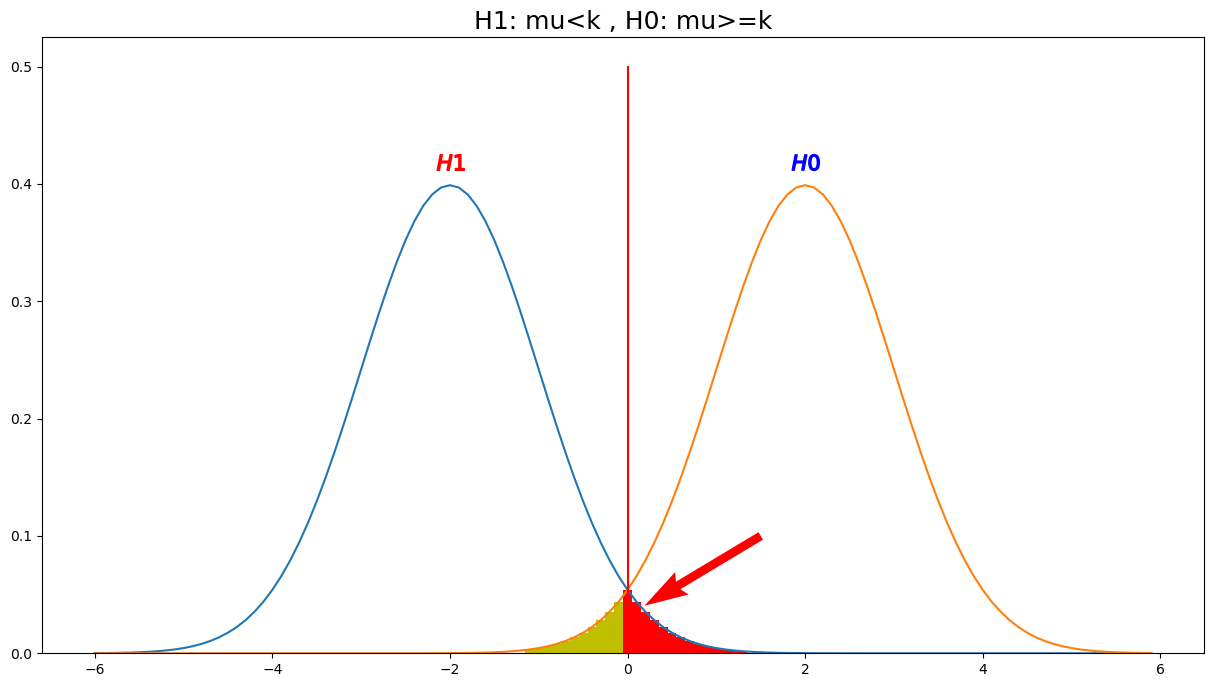

In [3]:
%matplotlib inline

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H1$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H0$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

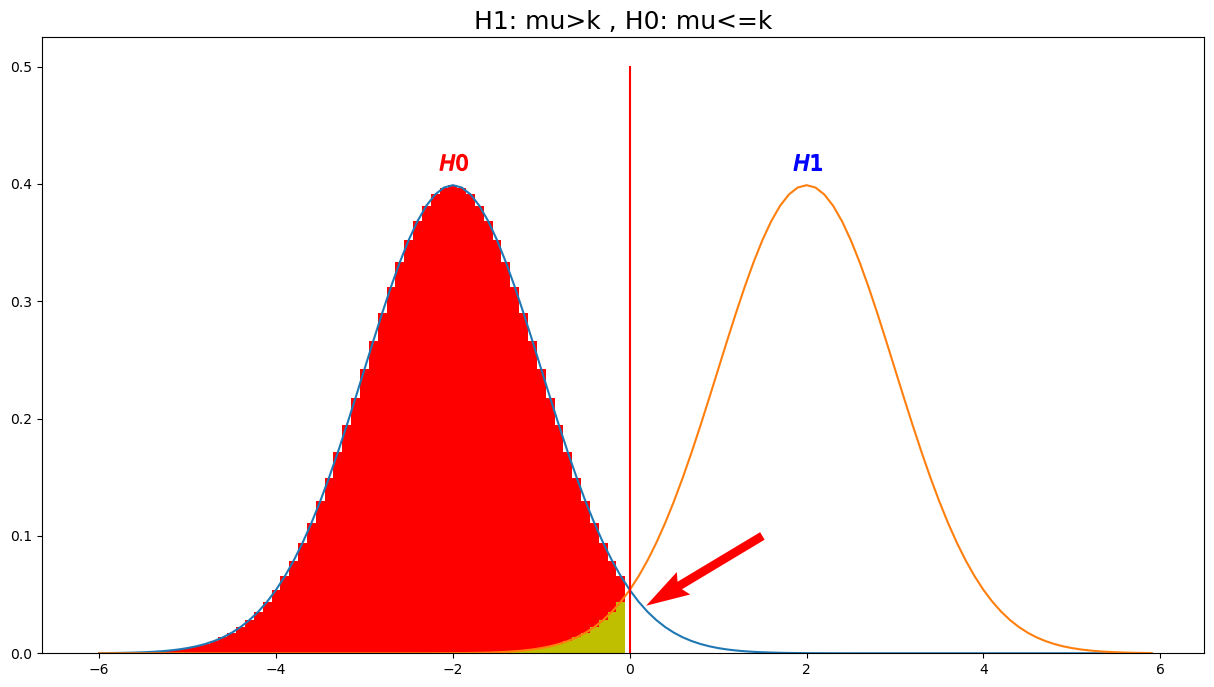

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

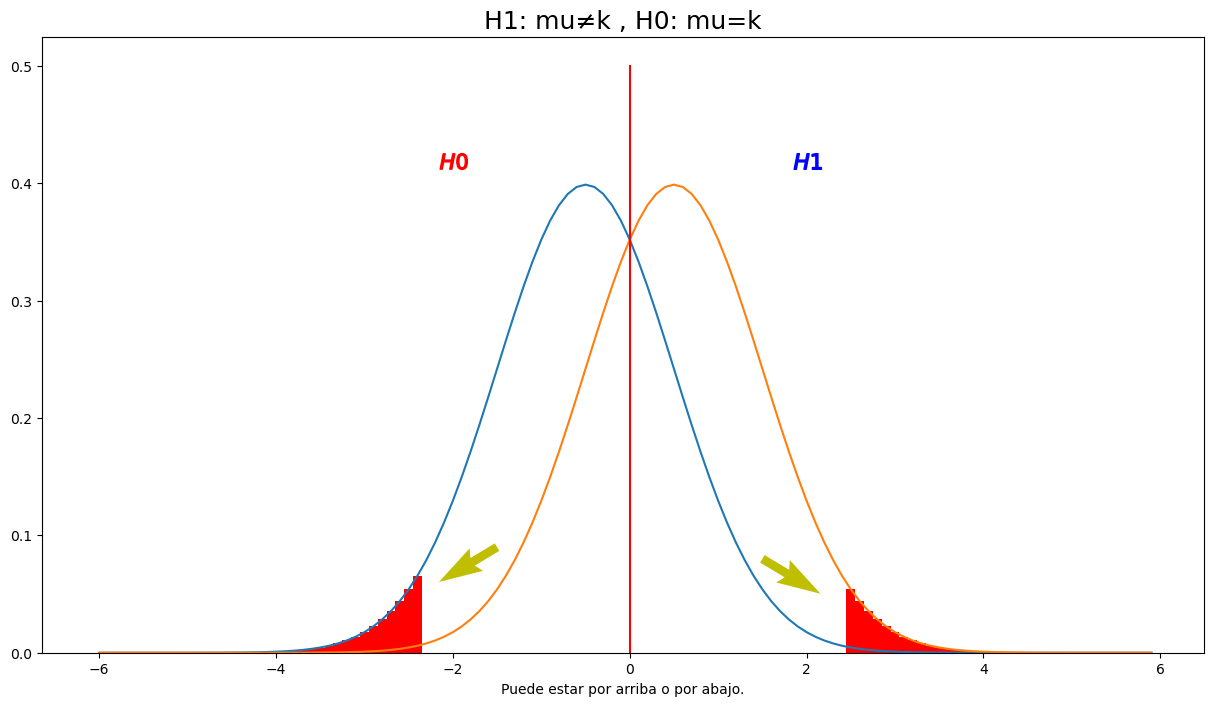

In [5]:
y1=[norm.pdf(x, -.5, 1) for x in x]
y2=[norm.pdf(x, .5, 1) for x in x]

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.08, 1, -0.6, color='y', scale=20)  # para pintar una flecha
plt.quiver(-1.5, 0.09, -1, -0.6, color='y', scale=20)

for i in range(85, 100):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y2[i], width=0.1, color='r')

for i in range(37):
    if y1[i]>=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu≠k , H0: mu=k', fontsize=18)
plt.xlabel('Puede estar por arriba o por abajo.');

# Ejemplo estudio farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [6]:
import numpy as np

from scipy.stats import t

In [7]:
# a manita


mu = 5.7   # media poblacional

mu_hat = 5.1 # media muestral, media del estudio

std_hat = 1.6 # std muestral, std del estudio

n=100   # tamaño de la muestra

In [8]:
t_test = (mu_hat - mu)/(std_hat/np.sqrt(n))

t_test

-3.750000000000003

In [10]:
# grados de libertad, tenemos una muestra de valores independientes

dof = n-1   

dof

99

In [11]:
p_value = t(df=dof).cdf(t_test)

p_value

0.0001489332089038242

In [12]:
# lo mismo...o casi

from scipy.stats import ttest_1samp

In [17]:
# son los datos, esto sale del dataframe, creando datos fake

# luego aqui van los datos

pacientes=np.random.normal(mu_hat, std_hat, n)

pacientes[:10]

array([5.32004163, 5.00527946, 5.29492326, 3.68426395, 3.2035398 ,
       5.25696734, 3.15881717, 2.82734186, 4.00013332, 5.33128986])

In [18]:
t_test=ttest_1samp(pacientes, mu, alternative='less')

t_test

Ttest_1sampResult(statistic=-4.591194746383391, pvalue=6.4836931056358915e-06)

In [19]:
t_test.statistic

-4.591194746383391

In [20]:
t_test.pvalue

6.4836931056358915e-06

**Conclusion:**

Si buscamos un intervalo de confianza del 99,9%, entonces $umbral=0.001$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Ejemplo Altura

Estudio media altura humana, 100 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0?

In [25]:
t_test = (1.72 - 1.7) / (0.2/np.sqrt(100))

p_value = 1 - t(df=99).cdf(t_test)

p_value

0.15987423706965065

In [34]:
# con scipy

t_test=ttest_1samp(np.random.normal(1.72, 0.2, 100),  # datos fake 
                   1.7,  # media a comparar, lo que me dan
                   alternative='greater'  # H1 > k
                  )

t_test

Ttest_1sampResult(statistic=0.8448957342033828, pvalue=0.20010314617329106)

In [35]:
t_test.pvalue

0.20010314617329106

**Conclusion**

Si buscamos un intervalo de confianza del 95%, entonces $umbral=0.05$

El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0.

**OJO**

Si buscamos un intervalo de confianza del 80%, entonces $umbral=0.2$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Z-test  

$N(\mu, \sigma)$

supongamos $\sigma=0.25$ , std de la poblacion

In [ ]:
%pip install statsmodels

In [36]:
from statsmodels.stats import weightstats as w    # el alias es mio

In [42]:
datos_fake=np.random.normal(1.72, 0.25, 100)

In [49]:
z_score, p_value = w.ztest(datos_fake,
                           value=1.7,
                           alternative='smaller')

z_score, p_value

(-0.12683475160939098, 0.44953559501985146)

In [39]:
#help(w.ztest)

In [40]:
z_score = (1.72 - 1.7)/(0.25/np.sqrt(100))

z_score

0.8000000000000007

In [51]:
from scipy.stats import norm

p_value = norm().cdf(z_score)   

p_value

0.44953559501985146

# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Por otro lado hay que considerar la independencia de las muestras.

Si son dependientes (matched pairs), entonces se usa el t-test:

+ Welch's t-test


$$t=\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1^2}+\frac{s_2^2}{n_2^2}}}$$

In [52]:
import pandas as pd

from scipy.stats import ttest_rel   # con muestras dependientes

from scipy.stats import ttest_ind   # con muestras independientes

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

In [53]:
b_pres=pd.read_csv('../data/blood_pressure 2.csv')

b_pres.head()

before       after
0  136.713072   92.432965
1  134.735618  105.022643
2  127.529115   82.242766
3  144.527126   93.607172
4  124.214720  103.212223

In [54]:
ttest_rel(b_pres.before, b_pres.after)

Ttest_relResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [57]:
ttest_1samp(b_pres.before - b_pres.after, 0)

Ttest_1sampResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [55]:
b_pres.before.mean(), b_pres.after.mean()

(136.53695250569925, 99.23670008065471)

In [58]:
b_pres.before.std(), b_pres.after.std()

(10.189313601006058, 9.060199908061609)

In [59]:
b_pres.before.mean() - b_pres.after.mean()

37.30025242504453

**Conclusion**

El p_Value tiende a cero. Podemos rechazar H0.

### muestras independientes


In [60]:
ab_test=pd.read_csv('../data/ab_test.csv')

ab_test.head()

a      b
0   0.27  13.61
1   6.08  21.53
2  13.74   9.23
3   9.70   5.36
4   7.00  12.90

In [61]:
ttest_ind(ab_test['a'], ab_test['b'], alternative='two-sided')

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447344)

In [62]:
ab_test.a.mean(), ab_test.b.mean()

(9.3554, 12.466000000000001)

In [63]:
ab_test.a.std(), ab_test.b.std()

(5.2352701858039135, 6.4912553422560215)

In [67]:
ab_test.a.mean() - ab_test.b.mean()

-3.1106000000000016

In [65]:
#help(ttest_ind)

In [66]:
ttest_ind(ab_test['a'], ab_test['b'], 
          alternative='two-sided',
         equal_var=False)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009776243024828827)

**Conclusion**

El p_value es menor que el umbral, dependiendo del intervalo de confianza, pero siendo asi podemos rechazar H0, y decir que existe una diferencia significativa entre ambas muestras, una pagina web funciona mejor que otra.

## Normalidad - Test de Shapiro

**H0: es Normal**


**H1 : NO es Normal**

In [68]:
from scipy.stats import shapiro

In [69]:
shapiro(ab_test.a)   # es normal, NO puedo rechazar H0

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [70]:
shapiro(ab_test.b)

ShapiroResult(statistic=0.965631365776062, pvalue=0.1529160439968109)

**normalizando**

In [74]:
# normalizando (standarizacion) a mano


a_normal = (ab_test.a - ab_test.a.mean())/(ab_test.a.std()/np.sqrt(len(ab_test.a)))

# N(0, 1) normal media=0 std=1                               

a_normal[:10]

0   -12.271283
1    -4.423950
2     5.922102
3     0.465437
4    -3.181344
5    -6.193314
6    -9.178272
7    -2.857185
8    -2.776146
9   -11.474393
Name: a, dtype: float64

In [75]:
a_normal.mean()

6.483702463810914e-16

In [76]:
a_normal.std()

7.071067811865476

In [77]:
shapiro(a_normal)

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [80]:
shapiro(ab_test.a)

ShapiroResult(statistic=0.9778033494949341, pvalue=0.46350130438804626)

In [78]:
ab_test.a.mean()

9.3554

In [79]:
ab_test.a.std()

5.2352701858039135

In [ ]:
%pip install scikit-learn

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
StandardScaler().fit_transform(ab_test)[:10]

array([[-1.75304036,  0.17802635],
       [-0.63199291,  1.41051648],
       [ 0.84601457, -0.50357804],
       [ 0.06649104, -1.10581753],
       [-0.45447765,  0.06753797],
       [-0.8847592 , -0.25459013],
       [-1.31118173, -0.2748204 ],
       [-0.40816932,  0.48303654],
       [-0.39659224, -0.31839328],
       [-1.63919905,  1.00124261]])

In [83]:
pd.DataFrame(StandardScaler().fit_transform(ab_test), 
             columns=ab_test.columns).head()

a         b
0 -1.753040  0.178026
1 -0.631993  1.410516
2  0.846015 -0.503578
3  0.066491 -1.105818
4 -0.454478  0.067538

In [84]:
ab_test.head()

a      b
0   0.27  13.61
1   6.08  21.53
2  13.74   9.23
3   9.70   5.36
4   7.00  12.90

**Intervalos de confianza**

In [85]:
from scipy.stats import sem   # error standard

In [87]:
#help(t.interval)

In [101]:
t.interval(0.99, 
           len(ab_test.a)-1, 
           loc=ab_test.a.mean(),
           scale=sem(ab_test.a))

(7.371219811062146, 11.339580188937852)

**test de proporciones**

In [102]:
from statsmodels.stats.proportion import proportions_ztest

In [104]:
ab_test['cat']=['a' if i%2 else 'b' for i in range(len(ab_test))]

ab_test.head()

a      b cat
0   0.27  13.61   b
1   6.08  21.53   a
2  13.74   9.23   b
3   9.70   5.36   a
4   7.00  12.90   b

In [105]:
ab_test['cat'].value_counts()

b    25
a    25
Name: cat, dtype: int64

In [109]:
ab_test['cat'].value_counts()[1]

25

In [111]:
z_score, p_value= proportions_ztest(ab_test['cat'].value_counts()[1],
                                    len(ab_test),
                                    0.5)

z_score, p_value

(0.0, 1.0)

In [106]:
help(proportions_ztest)

Help on function proportions_ztest in module statsmodels.stats.proportion:

proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
    Test for proportions based on normal (z) test
    
    Parameters
    ----------
    count : {int, array_like}
        the number of successes in nobs trials. If this is array_like, then
        the assumption is that this represents the number of successes for
        each independent sample
    nobs : {int, array_like}
        the number of trials or observations, with the same length as
        count.
    value : float, array_like or None, optional
        This is the value of the null hypothesis equal to the proportion in the
        case of a one sample test. In the case of a two-sample test, the
        null hypothesis is that prop[0] - prop[1] = value, where prop is the
        proportion in the two samples. If not provided value = 0 and the null
        is prop[0] = prop[1]
    alternative : str in ['two-sided', 'sma